In [1]:
!pip install opencv-python
!pip install torch torchvision
!pip install ultralytics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 116MB/s]


In [3]:
results = model.predict("//content/videoplayback.mp4", save=True, conf=0.2, iou=0.5)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/2042) //content/videoplayback.mp4: 384x640 11 persons, 1 bicycle, 1 cup, 4 chairs, 114.9ms
video 1/1 (frame 2/2042) //content/videoplayback.mp4: 384x640 10 persons, 1 bicycle, 1 cup, 5 chairs, 1 dining table, 10.9ms
video 1/1 (frame 3/2042) //content/videoplayback.mp4: 384x640 11 persons, 1 bicycle, 1 cup, 5 chairs, 1 dining table, 8.3ms
video 1/1 (frame 4/2042) //content/videoplayback.mp4: 384x640 10 persons, 1 bicycle, 1 cup, 5 cha

In [4]:
print(results)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



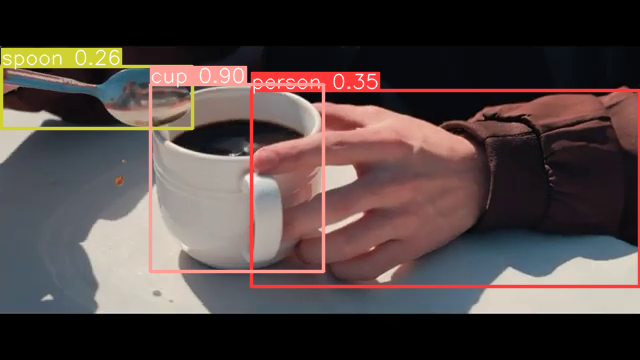

In [5]:
import PIL
from PIL import Image
# Plotting results
plot = results[347].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [6]:
!pwd

/content


In [7]:
results = model.predict("/content/Knife_image_project.jpg", save=True, conf=0.2, iou=0.5)


image 1/1 /content/Knife_image_project.jpg: 640x480 1 skateboard, 1 scissors, 103.9ms
Speed: 9.4ms preprocess, 103.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


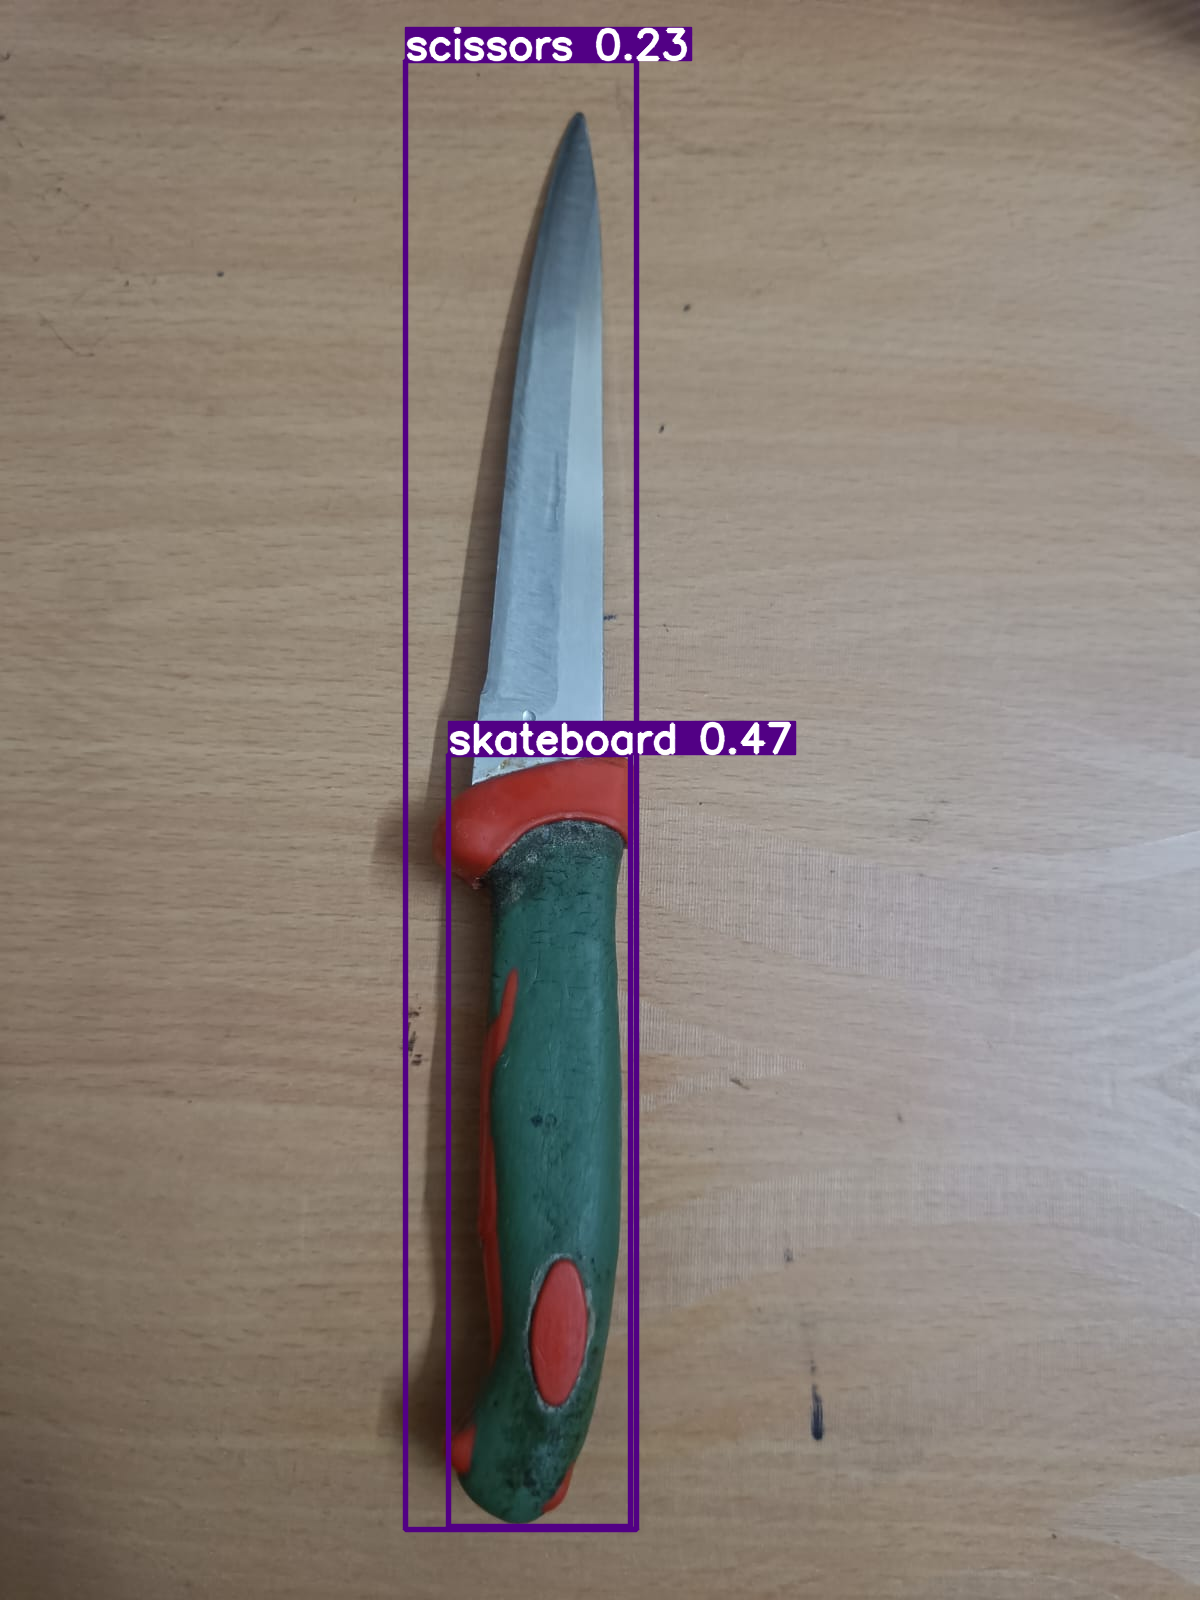

In [8]:
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 115MB/s]


In [10]:
results = model.predict("/content/whatsapp_image_project.jpg", save=True, conf=0.2, iou=0.5)


image 1/1 /content/whatsapp_image_project.jpg: 480x640 1 person, 2 dogs, 90.4ms
Speed: 3.1ms preprocess, 90.4ms inference, 15.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict


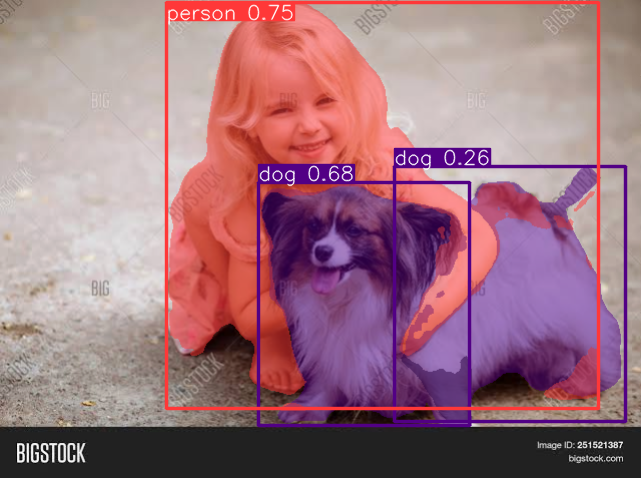

In [11]:
# Plotting results

plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [12]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.30M/5.30M [00:00<00:00, 120MB/s]


In [13]:
results = model.predict("/content/whatsapp_image_project.jpg", save=True, conf=0.2, iou=0.5)


100%|██████████| 755k/755k [00:00<00:00, 26.9MB/s]

image 1/1 /content/whatsapp_image_project.jpg: 224x224 papillon 0.77, Pekinese 0.13, Japanese_spaniel 0.03, Shih-Tzu 0.01, Shetland_sheepdog 0.01, 3.1ms
Speed: 50.5ms preprocess, 3.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


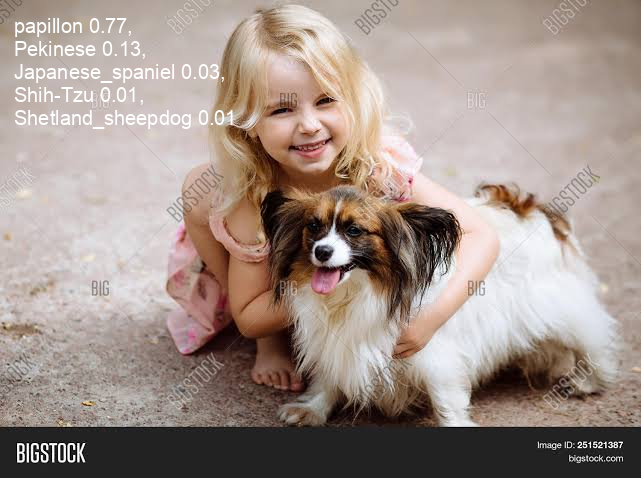

In [14]:
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


In [15]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [16]:
%cd /content/drive/MyDrive/Data

/content/drive/MyDrive/Data


In [17]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid  yolov8n.pt


In [18]:
# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')

In [19]:
# Verify the classes in the trained model
print(model.model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [20]:
# Train the model(FINE TUNING)
results = model.train(data='/content/drive/MyDrive/Data/data.yaml', epochs=5, batch=16, imgsz=640, plots=True)

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Data/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Data/train/labels.cache... 10194 images, 10 backgrounds, 0 corrupt: 100%|██████████| 10204/10204 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Data/valid/labels.cache... 610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 610/610 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.24G       1.13      2.309      1.369         94        640: 100%|██████████| 638/638 [36:11<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


                   all        610       1333      0.385      0.348      0.328      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.19G      1.048      1.795      1.301        126        640: 100%|██████████| 638/638 [05:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]


                   all        610       1333      0.561      0.401      0.467      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.18G      1.006      1.634      1.268        128        640: 100%|██████████| 638/638 [04:57<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


                   all        610       1333      0.611      0.514      0.562      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.26G     0.9441      1.473      1.227        138        640: 100%|██████████| 638/638 [04:56<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.06it/s]


                   all        610       1333      0.737      0.589      0.671      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.35G     0.8873      1.327      1.189        130        640: 100%|██████████| 638/638 [05:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.18it/s]


                   all        610       1333      0.836      0.691      0.795      0.551

5 epochs completed in 0.960 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]


                   all        610       1333      0.836      0.689      0.795       0.55
                 Baton         29         33      0.652      0.576       0.58      0.267
               Grenade        189        288      0.859      0.698       0.84      0.634
                   Gun        312        427      0.942      0.687      0.876      0.604
                 Knife        205        283      0.845      0.636      0.767      0.534
                Pistol        255        302      0.881      0.848      0.909      0.713
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train5


In [21]:
# Verify the classes in the trained model
print(model.model.names)

{0: 'Baton', 1: 'Grenade', 2: 'Gun', 3: 'Knife', 4: 'Pistol'}


In [24]:
results = model.predict("/content/Knife_image_project.jpg", save=True, conf=0.2, iou=0.5)


image 1/1 /content/Knife_image_project.jpg: 640x480 1 Knife, 37.6ms
Speed: 3.9ms preprocess, 37.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train53


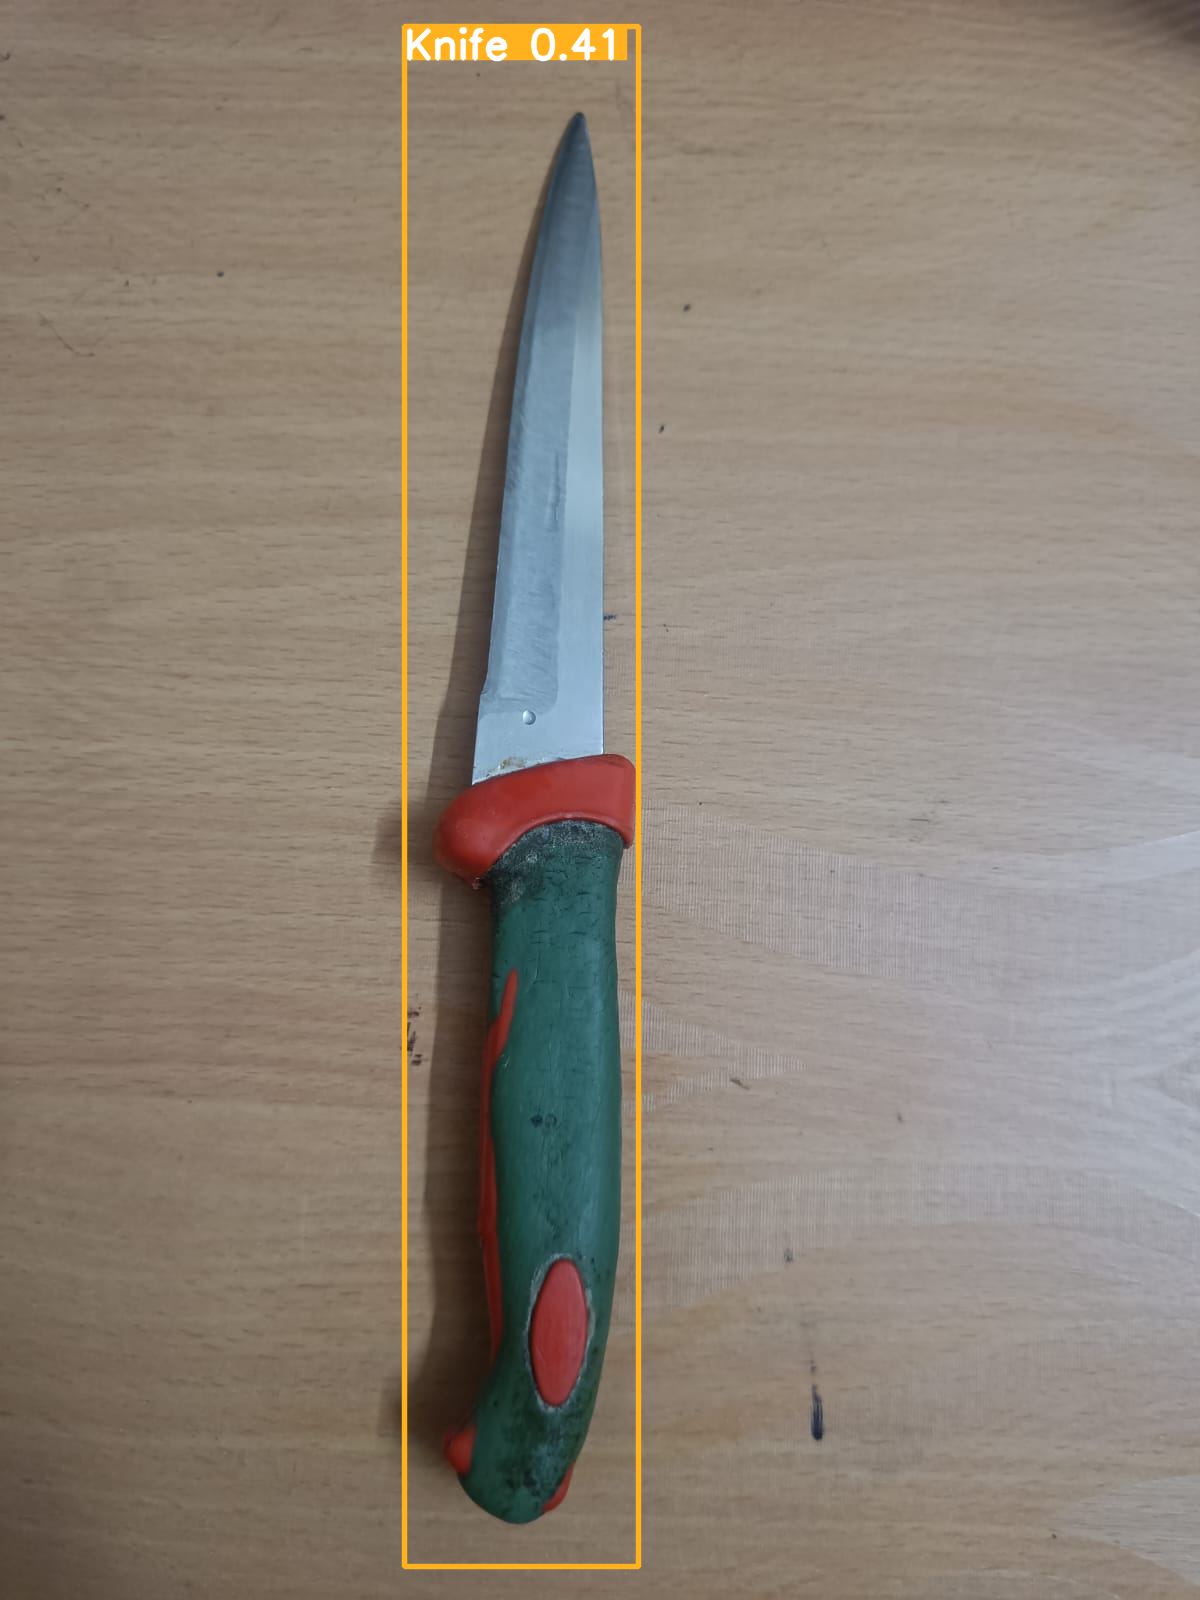

In [25]:
import PIL
from PIL import Image
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [27]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/drive/MyDrive/Data/runs/detect/train2/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Data/test/labels... 281 images, 0 backgrounds, 0 corrupt: 100%|██████████| 281/281 [01:57<00:00,  2.40it/s]

val: New cache created: /content/drive/MyDrive/Data/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


                   all        281        615      0.886       0.71      0.829      0.627
                 Baton         15         17      0.918      0.588       0.74      0.523
               Grenade         77        132      0.845      0.712      0.825      0.649
                   Gun        144        203      0.966       0.71      0.899      0.657
                 Knife         98        126      0.861      0.706      0.792      0.596
                Pistol        115        137      0.838      0.831      0.892      0.708
Speed: 0.8ms preprocess, 7.3ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/val


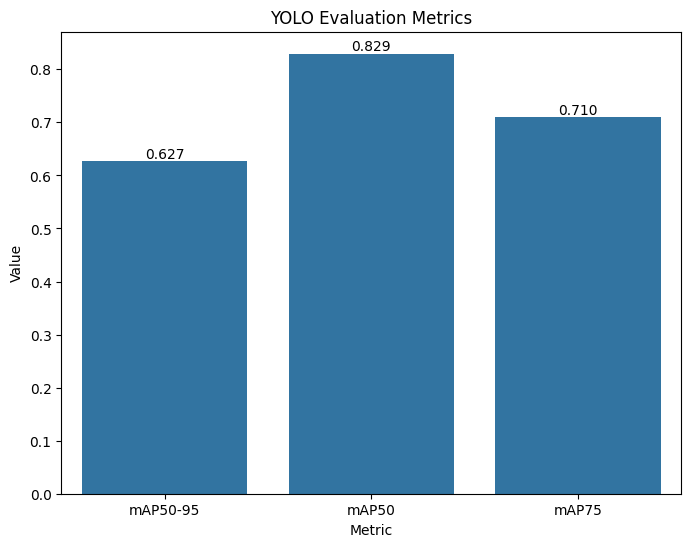

In [28]:
import seaborn as sns

%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

In [29]:
import pandas as pd

# Path to your CSV file
csv_path = '/content/drive/MyDrive/Data/runs/detect/train2/results.csv'

# Read the CSV file
data = pd.read_csv(csv_path)

# Print the entire DataFrame
print(data)


                     epoch           train/box_loss           train/cls_loss  \
0                        1                  1.13040                   2.3092   
1                        2                  1.04800                   1.7949   
2                        3                  1.00620                   1.6335   
3                        4                  0.94415                   1.4732   
4                        5                  0.88728                   1.3268   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.3693                  0.38515                  0.34775   
1                   1.3014                  0.56053                  0.40079   
2                   1.2680                  0.61067                  0.51372   
3                   1.2274                  0.73697                  0.58944   
4                   1.1893                  0.83637                  0.69069   

          metrics/mAP50(B)      metric

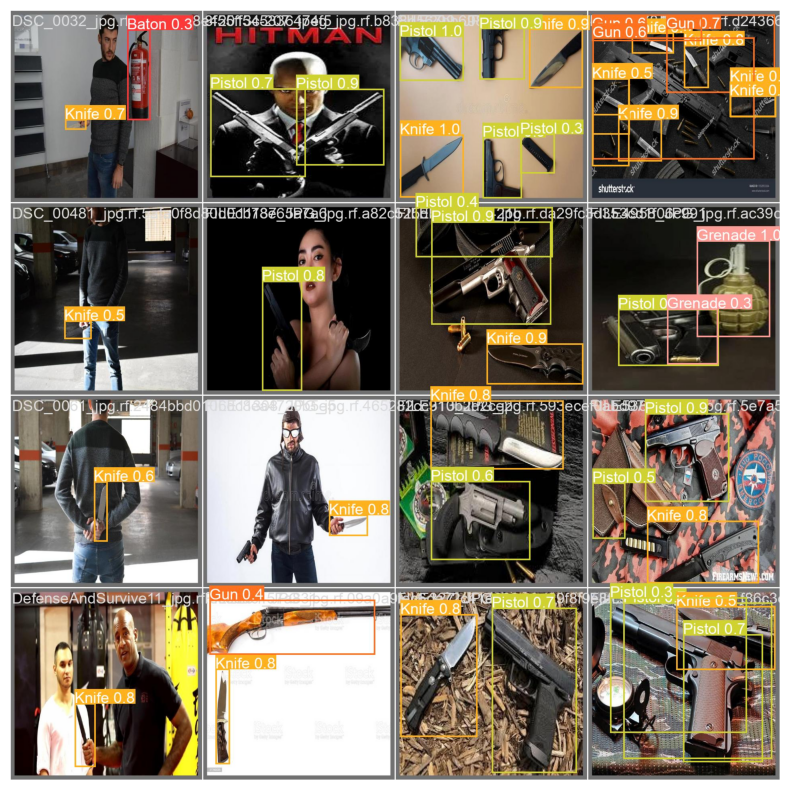

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/val_batch1_pred.jpg'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()

In [42]:
#/content/drive/MyDrive/Data/runs/detect/train2/val_batch1_pred.jpg

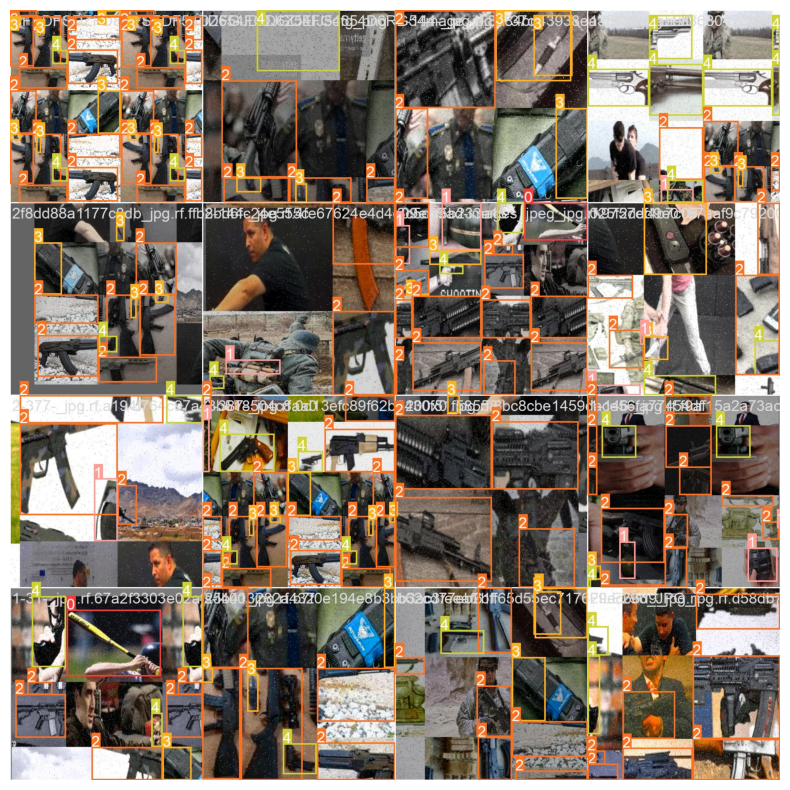

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/train_batch0.jpg'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()


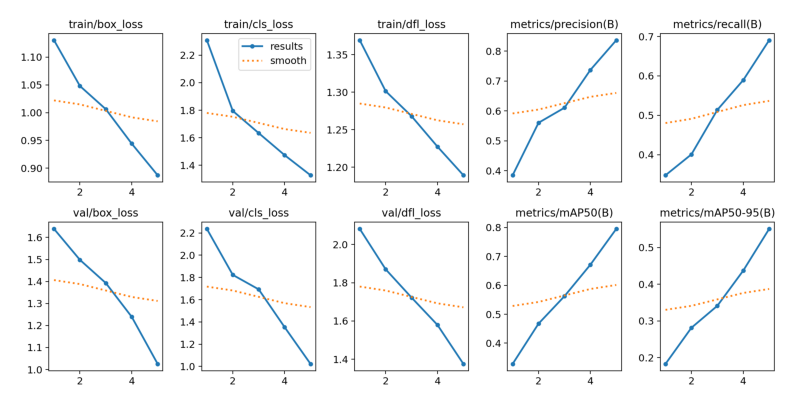

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/results.png'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()


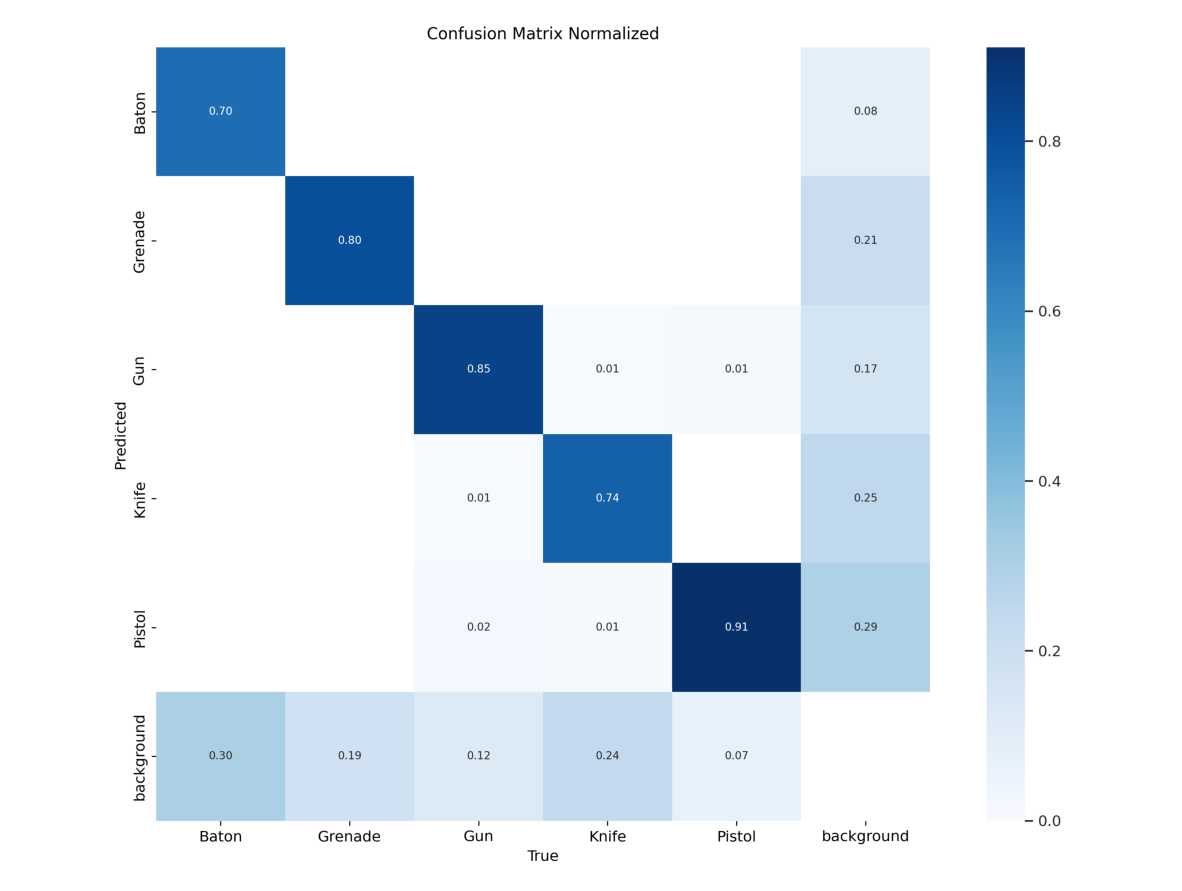

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/drive/MyDrive/Data/runs/detect/train2/confusion_matrix_normalized.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');


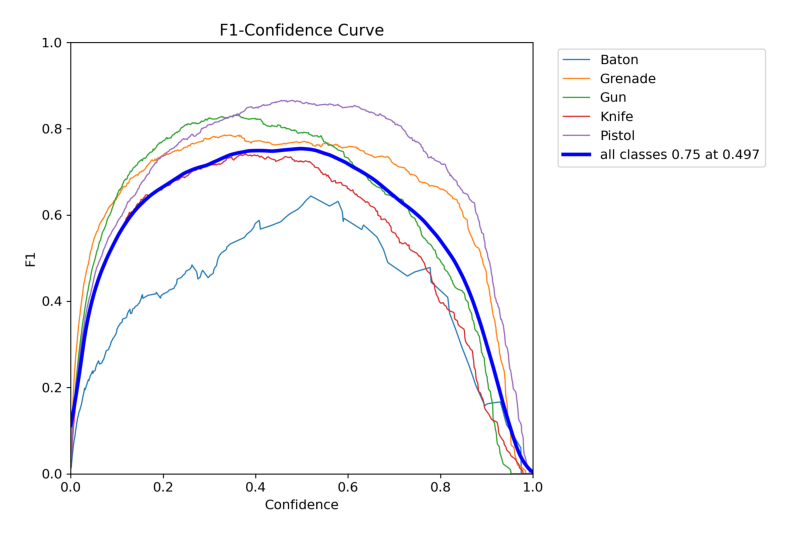

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/F1_curve.png'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()

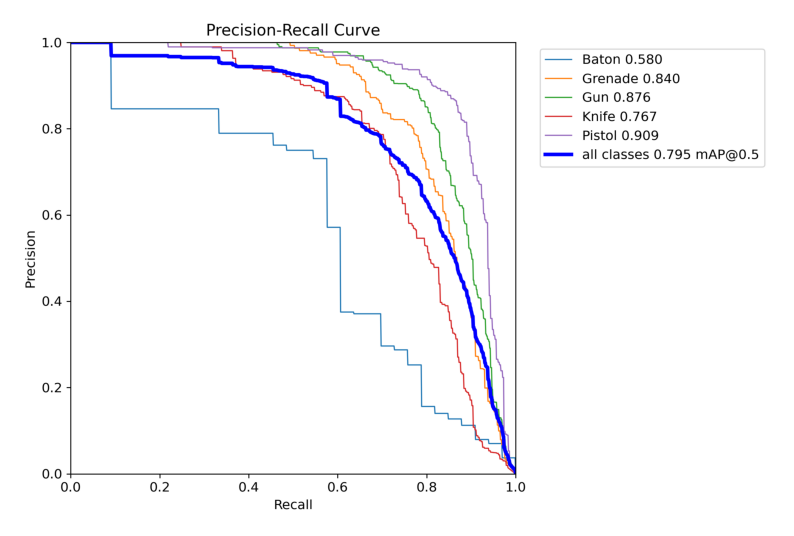

In [37]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/PR_curve.png'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()


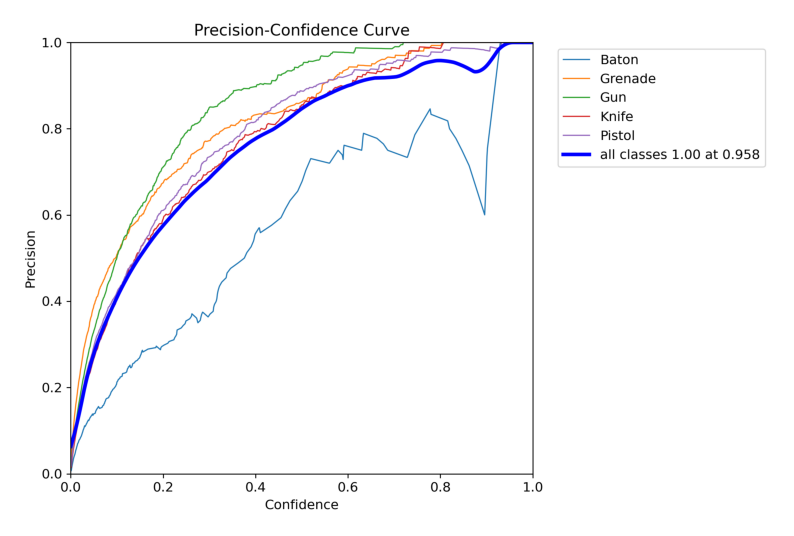

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/P_curve.png'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()

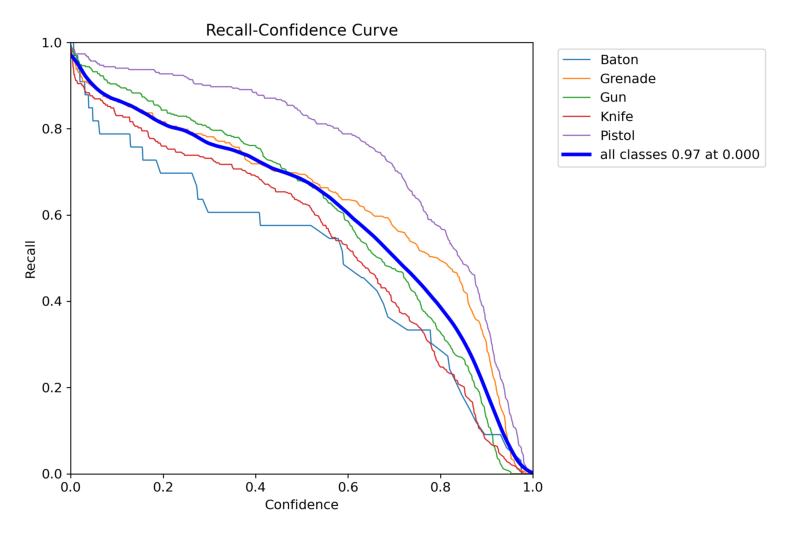

In [39]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/R_curve.png'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()


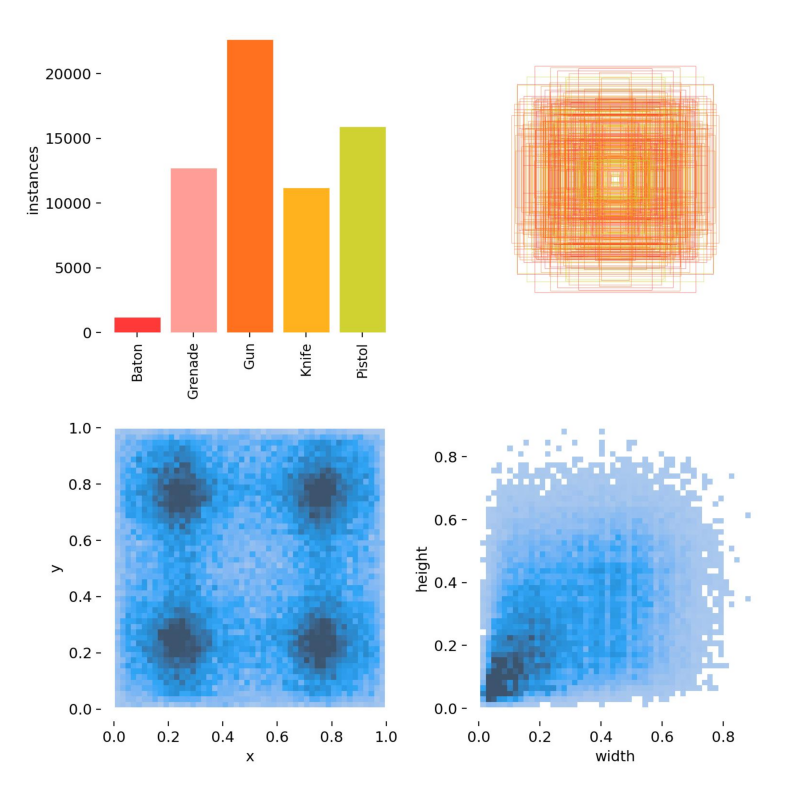

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/drive/MyDrive/Data/runs/detect/train2/labels.jpg'

# Load the image from the specified path
img = mpimg.imread(image_path)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))  # You can change the size (width, height) as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally hide the axis
plt.show()


**METHOD FOR INCORPORATING PRETRAINED CLASSES ALONG WITH THE CLASSES OF CUSTOM DATASET**

In [41]:
# import os
# import glob

# # Paths
# train_annotation_path = '/content/drive/MyDrive/data/train/labels'  # Path to your train annotations directory
# val_annotation_path = '/content/drive/MyDrive/data/valid/labels'  # Path to your val annotations directory
# new_class_offset = 80  # Offset for new classes, assuming COCO has 80 classes
# new_class_count = 6  # Number of new classes

# # Function to update class labels in annotation files
# def update_annotations(annotation_path, new_class_offset, new_class_count):
#     annotation_files = glob.glob(os.path.join(annotation_path, '*.txt'))
#     for annotation_file in annotation_files:
#         with open(annotation_file, 'r') as file:
#             lines = file.readlines()

#         updated_lines = []
#         for line in lines:
#             parts = line.strip().split()
#             class_id = int(parts[0])
#             # Assuming that the new classes were originally labeled from 0 to new_class_count-1
#             if class_id < new_class_count:
#                 class_id += new_class_offset
#             parts[0] = str(class_id)
#             updated_lines.append(' '.join(parts))

#         # Write the updated lines back to the file
#         with open(annotation_file, 'w') as file:
#             file.write('\n'.join(updated_lines))

# # Run the update function for both train and val directories
# update_annotations(train_annotation_path, new_class_offset, new_class_count)
# update_annotations(val_annotation_path, new_class_offset, new_class_count)
